In [1]:
# Import Require Packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Load the datase
df = pd.read_csv("dataset/adult.csv")

In [41]:
# Top 5 data from dataset
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Shape of the dataset
df.shape

(48842, 15)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Checking any null values in the dataset
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
# Seprating Categorigal and NumericaL Data
df_categorical = df.select_dtypes(include="object").columns
df_numerical = df.select_dtypes(exclude="object").columns

In [11]:
df_categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [12]:
df_numerical

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [13]:
for i in df_categorical:
    print(i,df[i].unique(),'\n')

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender ['Male' 'Female'] 

native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 

In [14]:
df["workclass"]= df["workclass"].replace('?',"Private")
df["occupation"]= df["occupation"].replace('?',"Prof-specialty")
df["native-country"]= df["native-country"].replace('?',"United-States")

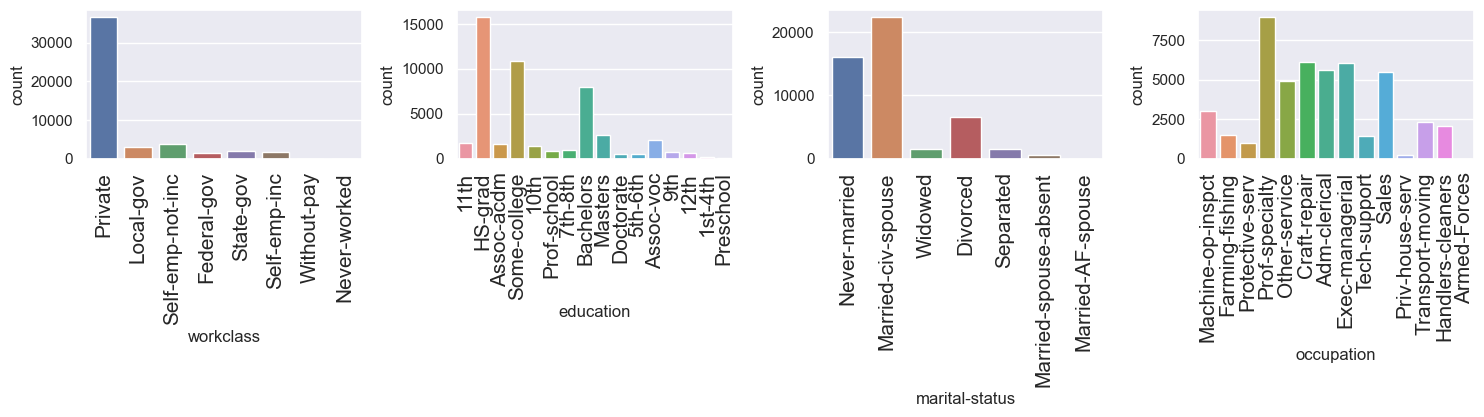

In [15]:
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(15,6)})
column1 = ["workclass","education","marital-status","occupation"]

for i in range(0,len(column1)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=df[column1[i]])
        plt.xticks(size = 15,rotation=90)
        plt.tight_layout()     

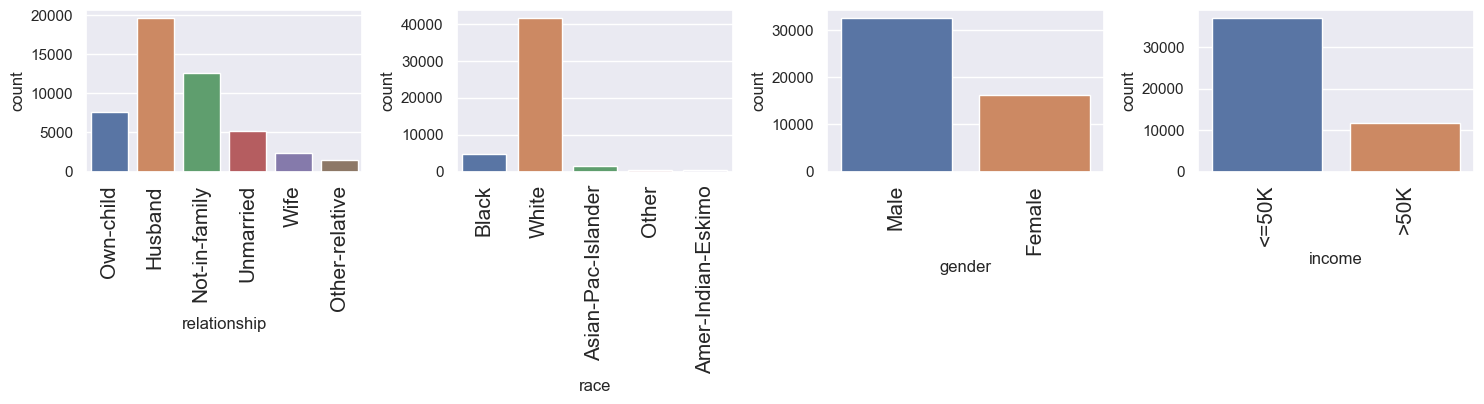

In [16]:
column2 = ["relationship","race","gender","income"]
for i in range(0,len(column2)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=df[column2[i]])
        plt.xticks(size = 15,rotation=90)
        plt.tight_layout() 

C:\Users\sksan\AppData\Local\Temp\ipykernel_11152\330600413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[df_numerical[i]])
C:\Users\sksan\AppData\Local\Temp\ipykernel_11152\330600413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[df_numerical[i]])
C:\Users\sksan\AppData\Loc

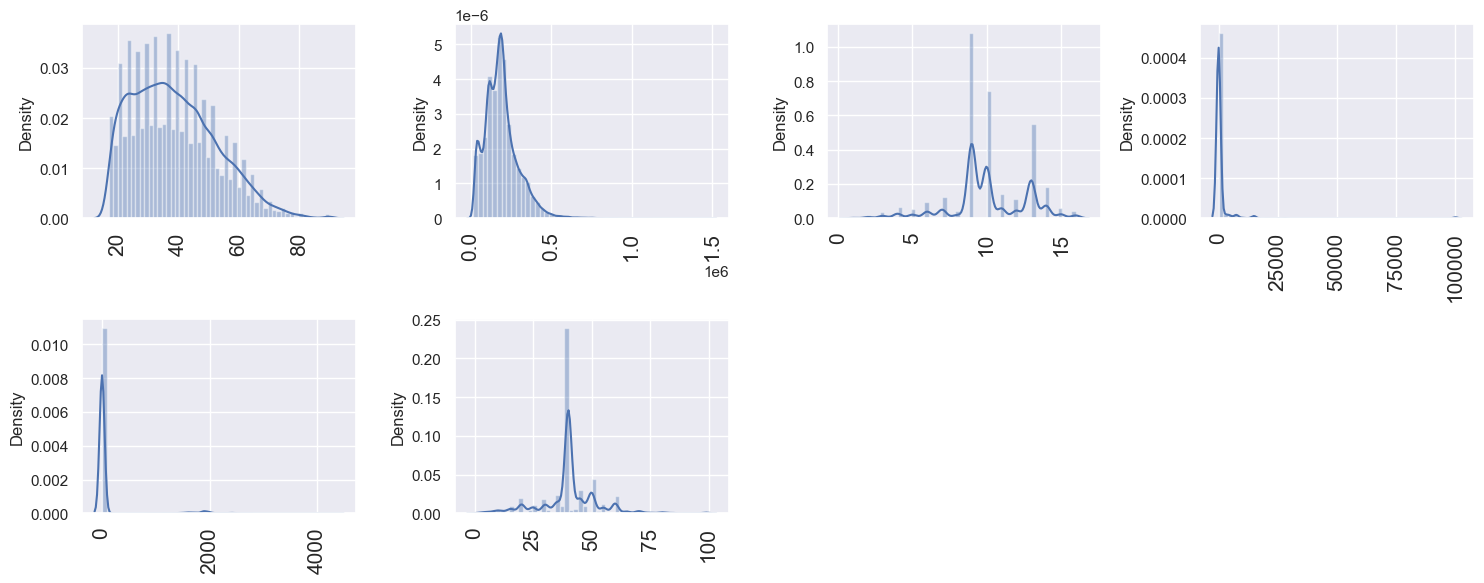

In [17]:
for i in range(0,len(df_numerical)):
        plt.subplot(2,4,i+1)
        sns.distplot(x=df[df_numerical[i]])
        plt.xticks(size = 15,rotation=90)
        plt.tight_layout() 

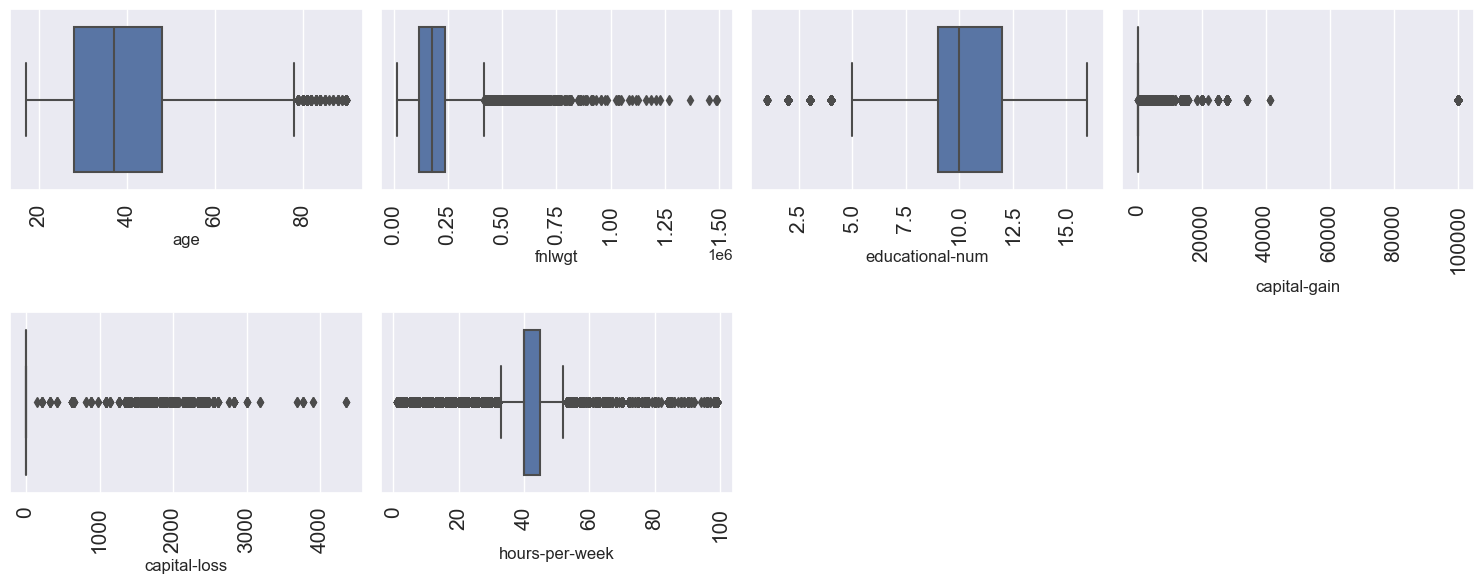

In [18]:
for i in range(0,len(df_numerical)):
        plt.subplot(2,4,i+1)
        sns.boxplot(x=df[df_numerical[i]])
        plt.xticks(size = 15,rotation=90)
        plt.tight_layout() 

In [19]:
salary = pd.crosstab(df["income"],df["workclass"])

<Axes: xlabel='income'>

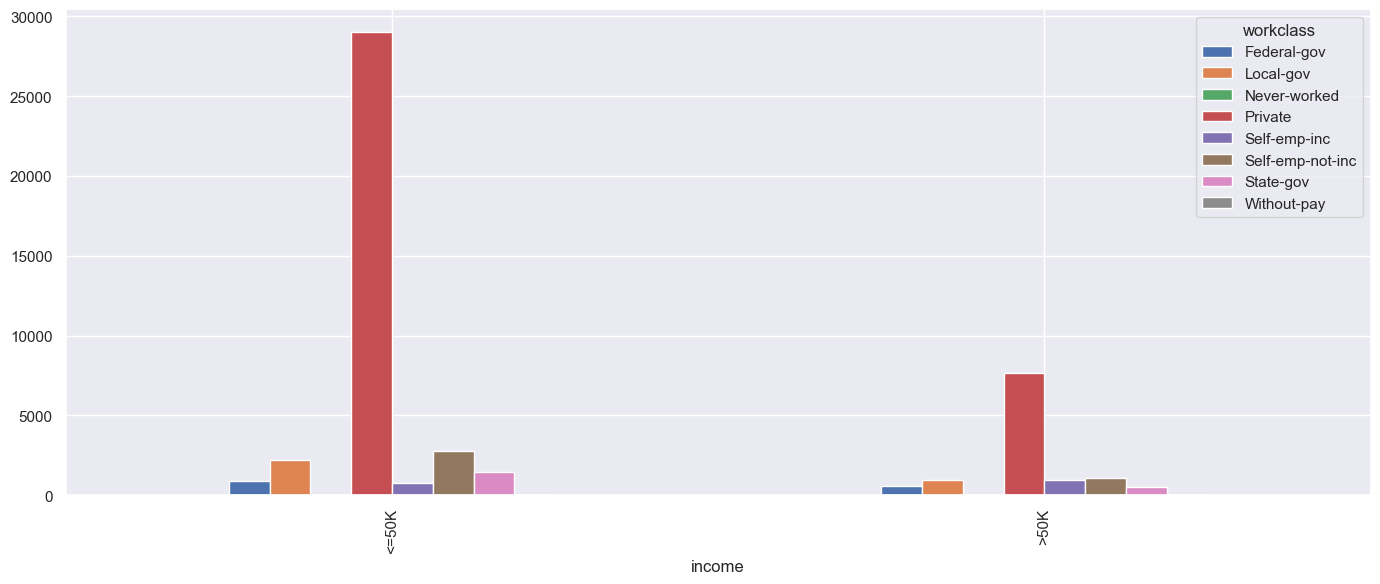

In [20]:
salary.plot(kind = "bar")

<Axes: xlabel='income'>

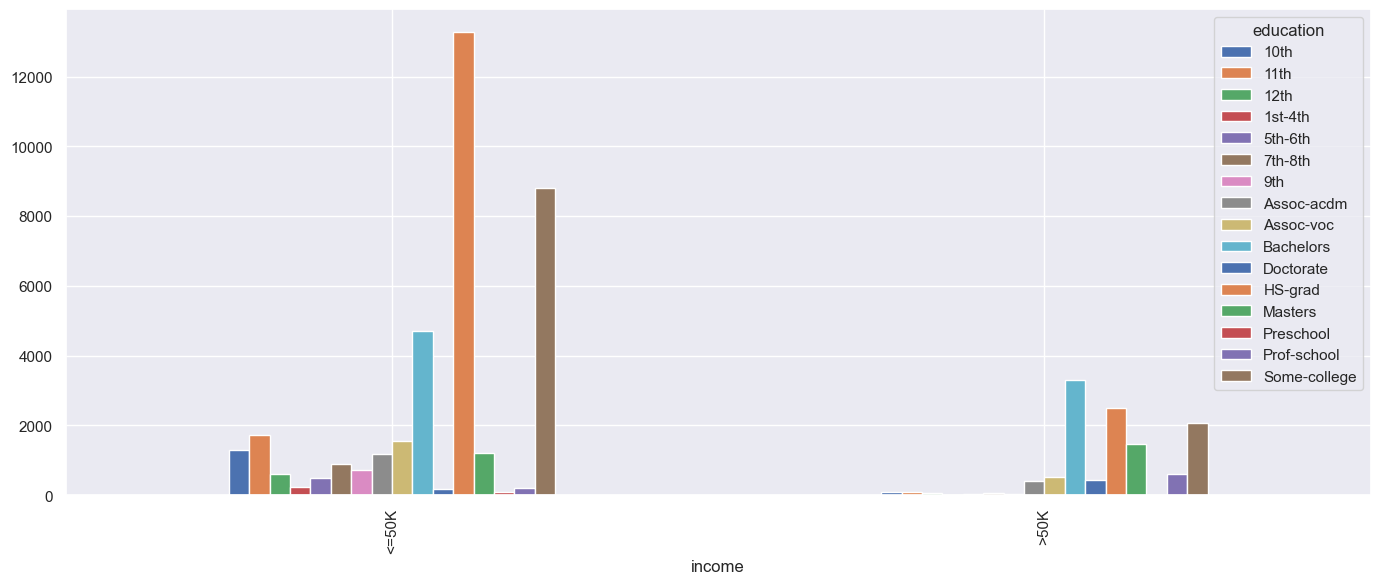

In [21]:
education = pd.crosstab(df["income"],df["education"])
education.plot(kind = "bar")

<Axes: xlabel='income'>

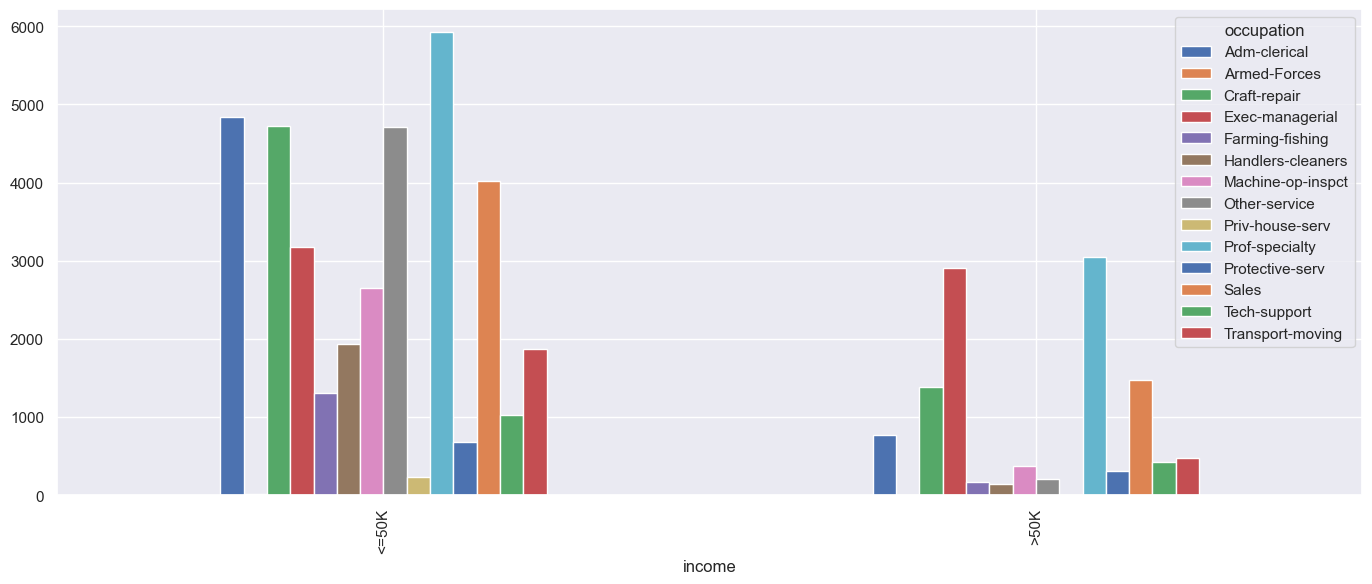

In [22]:
occupation = pd.crosstab(df["income"],df["occupation"])
occupation.plot(kind = "bar")

<Axes: xlabel='income'>

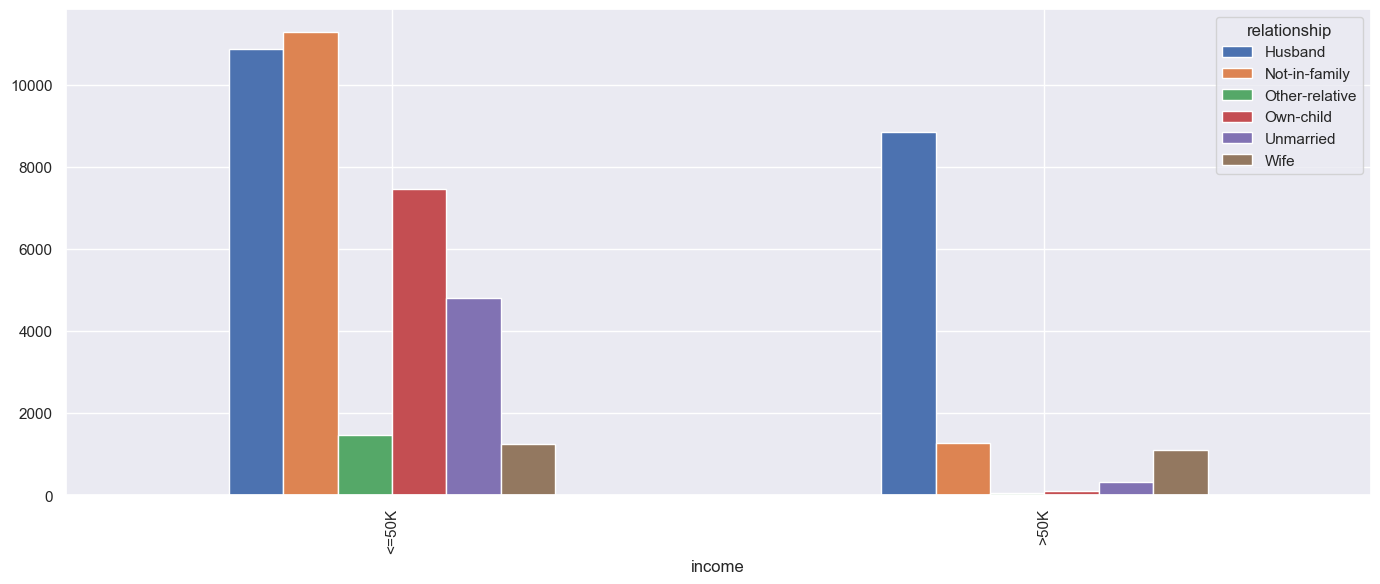

In [23]:
relationship = pd.crosstab(df["income"],df["relationship"])
relationship.plot(kind = "bar")

<Axes: xlabel='income'>

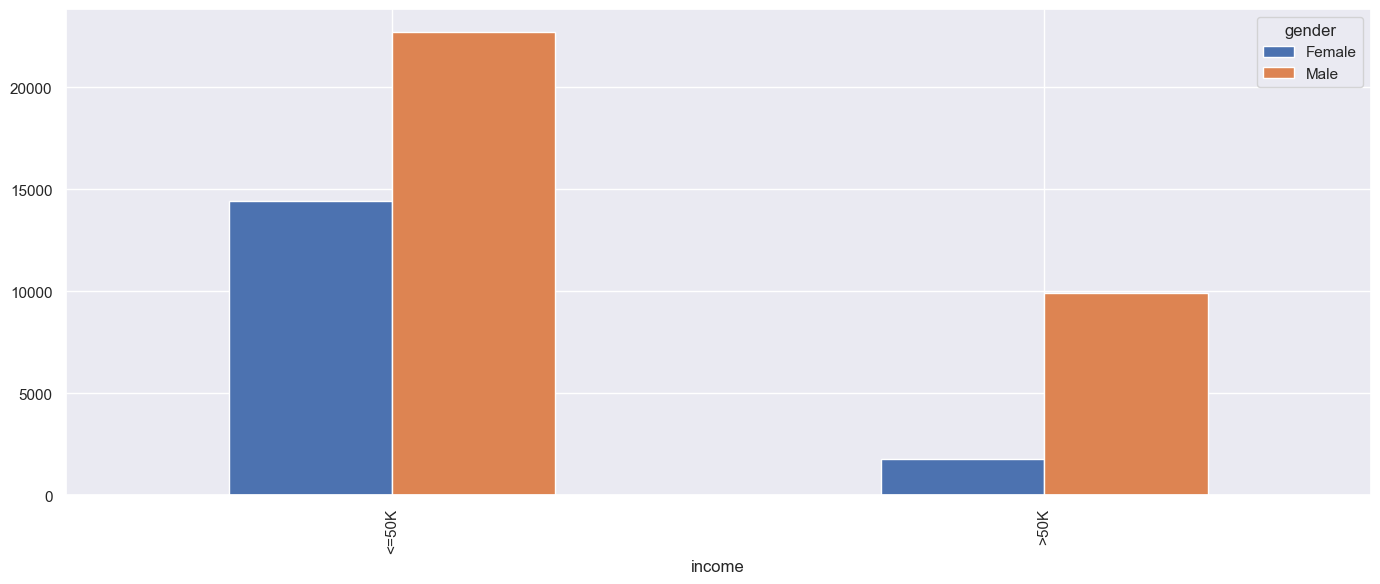

In [24]:
gender = pd.crosstab(df["income"],df["gender"])
gender.plot(kind = "bar")

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country']

for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [43]:
df["income"] = df["income"].map({'<=50K':0, '>50K':1})

<Axes: >

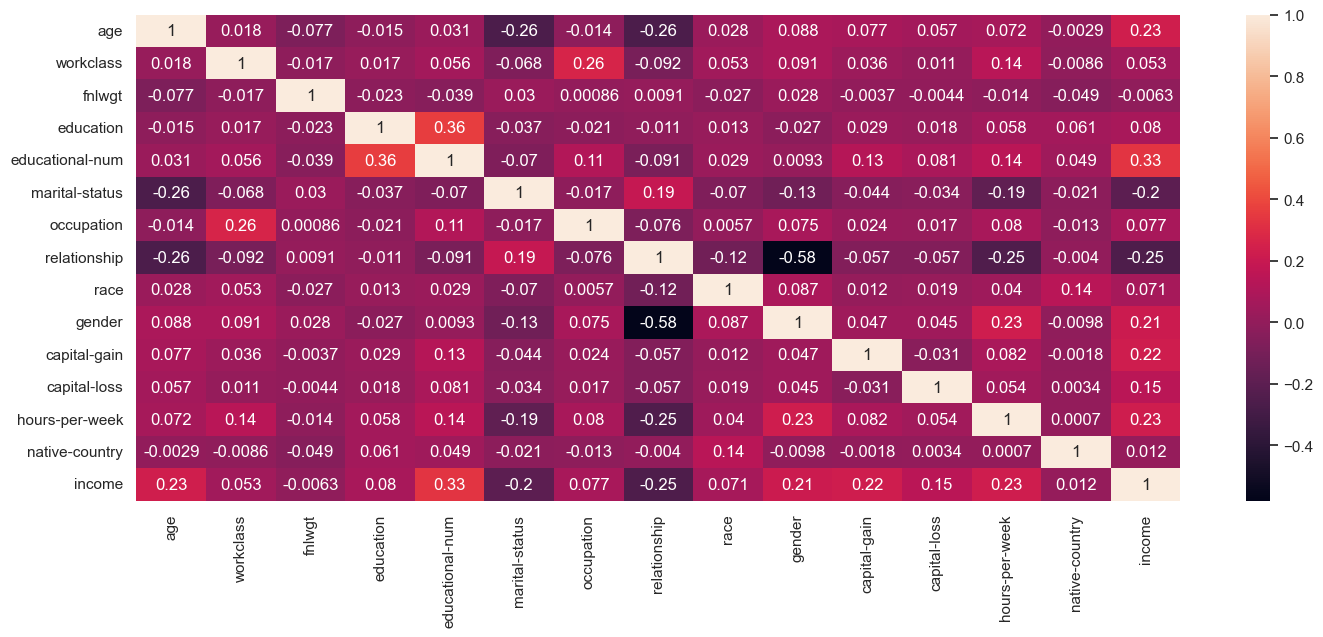

In [46]:
sns.heatmap(df.corr(),annot=True)

In [44]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [39]:
df.income.unique()

array([nan])

In [49]:
df.drop(["education","fnlwgt","native-country"], axis=1,inplace=True)

In [48]:
#sns.pairplot(df)

In [50]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,4,7,4,7,3,2,1,0,0,40,0
1,38,4,9,2,5,0,4,1,0,0,50,0
2,28,2,12,2,11,0,4,1,0,0,40,1
3,44,4,10,2,7,0,2,1,7688,0,40,1
4,18,0,10,4,0,3,4,0,0,0,30,0


In [51]:
X= df.drop("income", axis = 1)
y= df.income

In [56]:
df_numerical = X.select_dtypes(exclude="object").columns

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
num_pipeline = Pipeline(steps=[("imputer",SimpleImputer(strategy="median")),
                              ("scaler",StandardScaler())])

preprocessor = ColumnTransformer([(
    "num_pipeline",num_pipeline,df_numerical)
])

In [58]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape

(39073, 11)

In [63]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

ModuleNotFoundError: No module named 'lazypredict'

In [64]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [65]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:57<00:00,  6.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.88,0.81,0.81,0.88,1.09
LGBMClassifier,0.88,0.81,0.81,0.88,0.30
RandomForestClassifier,0.86,0.78,0.78,0.85,4.15
AdaBoostClassifier,0.87,0.77,0.77,0.86,1.18
ExtraTreesClassifier,0.85,0.77,0.77,0.84,4.07
BaggingClassifier,0.85,0.77,0.77,0.84,0.93
KNeighborsClassifier,0.84,0.76,0.76,0.84,3.69
NearestCentroid,0.74,0.76,0.76,0.76,0.07
DecisionTreeClassifier,0.83,0.76,0.76,0.83,0.16


In [68]:
model_accuracy = pd.DataFrame(models)

In [69]:
model_accuracy

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.88,0.81,0.81,0.88,1.09
LGBMClassifier,0.88,0.81,0.81,0.88,0.30
RandomForestClassifier,0.86,0.78,0.78,0.85,4.15
AdaBoostClassifier,0.87,0.77,0.77,0.86,1.18
ExtraTreesClassifier,0.85,0.77,0.77,0.84,4.07
BaggingClassifier,0.85,0.77,0.77,0.84,0.93
KNeighborsClassifier,0.84,0.76,0.76,0.84,3.69
NearestCentroid,0.74,0.76,0.76,0.76,0.07
DecisionTreeClassifier,0.83,0.76,0.76,0.83,0.16


In [125]:
# Load the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report

In [126]:
def performance_metrices(y_test,y_pred):
    confusionmatrix = print(f"confusion_matrix :  {confusion_matrix(y_test,y_pred)}")    
    accuracyscore = print(f"accuracy_score :  {accuracy_score(y_test,y_pred)}")    
    precisionscore = print(f"precision_score :  {precision_score(y_test,y_pred)}")    
    f1score= print(f"f1_score :  {f1_score(y_test,y_pred)}")    
    recallscore = print(f"recall_score :  {recall_score(y_test,y_pred)}")
    classi=print(f"classification_report :  {classification_report(y_test,y_pred)}")
    return confusionmatrix, accuracyscore ,precisionscore, f1score, recallscore,classi

In [77]:
lr = LogisticRegression()

In [80]:
param = { "class_weight":["balanced"],
        "penalty":["l1","l2"],
        "C":[0.0001,0.001,0.01,0.1],
        "solver":["liblinear","saga"]        
}

In [81]:
grid = GridSearchCV(estimator=lr,param_grid=param,cv=5,n_jobs=1, verbose=3)

In [82]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.773 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   0.9s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga;, score=0.779 total time=   0.9s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga;, score=0.777 total time=   0.9s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga;, score=0.773 total 

[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.7s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [83]:
y_pred = grid.predict(X_test)

In [127]:
performance_metrices(y_test=y_test,y_pred=y_pred)

confusion_matrix :  [[6962  517]
 [1578  712]]
accuracy_score :  0.7855461152625652
precision_score :  0.5793327908868999
f1_score :  0.40466041489059396
recall_score :  0.3109170305676856
classification_report :                precision    recall  f1-score   support

           0       0.82      0.93      0.87      7479
           1       0.58      0.31      0.40      2290

    accuracy                           0.79      9769
   macro avg       0.70      0.62      0.64      9769
weighted avg       0.76      0.79      0.76      9769



(None, None, None, None, None, None)

In [93]:
grid.score(X_train,y_train)

0.7791313694878816

In [94]:
dr = DecisionTreeClassifier()

In [104]:
param ={
    "class_weight":["balanced"],
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]    
}

In [105]:
grid_dr = GridSearchCV(estimator=dr,param_grid=param,cv=5,scoring="accuracy")

In [106]:
grid_dr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [120]:
y_pred_dr = grid_dr.predict(X_test)

In [128]:
performance_metrices(y_test=y_test,y_pred=y_pred_dr)

confusion_matrix :  [[5214 2265]
 [ 206 2084]]
accuracy_score :  0.747057017094892
precision_score :  0.4791906185329961
f1_score :  0.6278053923783702
recall_score :  0.9100436681222708
classification_report :                precision    recall  f1-score   support

           0       0.96      0.70      0.81      7479
           1       0.48      0.91      0.63      2290

    accuracy                           0.75      9769
   macro avg       0.72      0.80      0.72      9769
weighted avg       0.85      0.75      0.77      9769



(None, None, None, None, None, None)

In [122]:
grid_dr.score(X_train,y_train)

0.7419701584214163

In [112]:
rf = RandomForestClassifier()

In [116]:
param ={
    "class_weight":["balanced"],
    "n_estimators":[20,50,100],
    "max_depth":[10,8,5],
    "min_samples_split":[2,5,10]
}   

In [117]:
grid_rf = GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring="accuracy")

In [118]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='accuracy')

In [123]:
y_pred_rf = grid_rf.predict(X_test)

In [129]:
performance_metrices(y_test=y_test,y_pred=y_pred_rf)

confusion_matrix :  [[5937 1542]
 [ 277 2013]]
accuracy_score :  0.813798751151602
precision_score :  0.5662447257383966
f1_score :  0.6887938408896492
recall_score :  0.8790393013100437
classification_report :                precision    recall  f1-score   support

           0       0.96      0.79      0.87      7479
           1       0.57      0.88      0.69      2290

    accuracy                           0.81      9769
   macro avg       0.76      0.84      0.78      9769
weighted avg       0.86      0.81      0.83      9769



(None, None, None, None, None, None)